In [ ]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=ff46d07198dc78c1e60d2fe842d3869c1eb8ea911dd5eaa83b07d2701fac00ef
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
import skfuzzy as fuzyy
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base["BILL_AMT2"] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [ ]:
X = base.iloc[:,[1,25]].values

In [ ]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
X.shape

(30000, 2)

In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
r = fuzyy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [ ]:
r

(array([[-0.73893687, -0.30171174],
        [ 0.97507223, -0.42055454],
        [ 0.74996772,  2.01659626]]),
 array([[0.91181203, 0.84858533, 0.97912903, ..., 0.950106  , 0.95613018,
         0.97292913],
        [0.06226826, 0.12409229, 0.01587916, ..., 0.03497965, 0.02981329,
         0.01801149],
        [0.02591971, 0.02732238, 0.00499181, ..., 0.01491435, 0.01405653,
         0.00905938]]),
 array([[0.27716613, 0.65880646, 0.34839528, ..., 0.1653767 , 0.21082075,
         0.30928377],
        [0.06988944, 0.10772963, 0.29466644, ..., 0.61281719, 0.40650593,
         0.38992289],
        [0.65294443, 0.23346391, 0.35693828, ..., 0.22180612, 0.38267332,
         0.30079335]]),
 array([[0.55636064, 0.52134494, 0.20024751, ..., 0.39093112, 0.30019389,
         0.25950137],
        [2.12900007, 1.36332852, 1.57243726, ..., 2.03741054, 1.70002549,
         1.90724016],
        [3.29984859, 2.9054517 , 2.8045172 , ..., 3.12021198, 2.47583253,
         2.68924954]]),
 array([25869.677560

In [ ]:
previsoes_porcentagem = r[1]

In [ ]:
previsoes_porcentagem.shape

(3, 30000)

In [ ]:
previsoes_porcentagem

array([[0.91181133, 0.84857642, 0.97912689, ..., 0.95010603, 0.95612997,
        0.97293019],
       [0.0622699 , 0.12410146, 0.01588109, ..., 0.03498031, 0.02981418,
        0.01801122],
       [0.02591878, 0.02732212, 0.00499202, ..., 0.01491366, 0.01405585,
        0.00905859]])

In [ ]:
previsoes_porcentagem[0][0]

0.9118113262158668

In [ ]:
previsoes_porcentagem[1][0]

0.06226989702370665

In [ ]:
previsoes_porcentagem[2][0]

0.02591877676042654

In [ ]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [ ]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [ ]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
previsoes[5000]

0

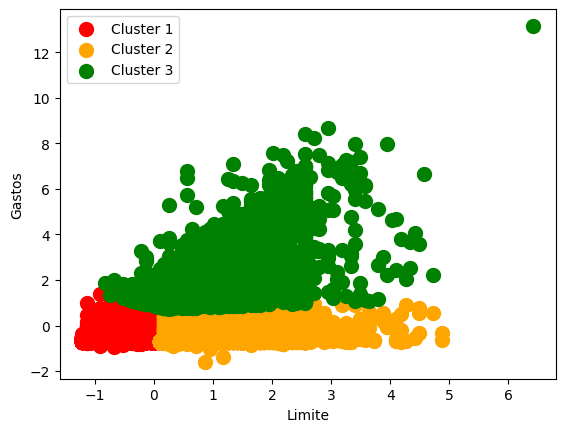

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1,1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();